<a href="https://colab.research.google.com/github/theclosedbook/TensorFlow/blob/main/01_neural_network_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Regression With Neural Networks
There are many definitions for a regression problem but in our case, we're going to simplify it to be: predicting a number.

For example, you might want to:

    Predict the selling price of houses given information about them (such as number of rooms, size, number of bathrooms).
    Predict the coordinates of a bounding box of an item in an image.
    Predict the cost of medical insurance for an individual given their demographics (age, sex, gender, race).

In this notebook, we're going to set the foundations for how you can take a sample of inputs (this is your data), build a neural network to discover patterns in those inputs and then make a prediction (in the form of a number) based on those inputs.
What we're going to cover

Specifically, we're going to go through doing the following with TensorFlow:

    Architecture of a regression model
    Input shapes and output shapes
        X: features/data (inputs)
        y: labels (outputs)
    Creating custom data to view and fit
    Steps in modelling
        Creating a model
        Compiling a model
            Defining a loss function
            Setting up an optimizer
            Creating evaluation metrics
        Fitting a model (getting it to find patterns in our data)
    Evaluating a model
        Visualizng the model ("visualize, visualize, visualize")
        Looking at training curves
        Compare predictions to ground truth (using our evaluation metrics)
    Saving a model (so we can use it later)
    Loading a model

Typical architecture of a regresison neural network

The word typical is on purpose.

Why?

Because there are many different ways (actually, there's almost an infinite number of ways) to write neural networks.

But the following is a generic setup for ingesting a collection of numbers, finding patterns in them and then outputting some kind of target number.

Yes, the previous sentence is vague but we'll see this in action shortly.
Hyperparameter 	Typical value
Input layer shape 	Same shape as number of features (e.g. 3 for # bedrooms, # bathrooms, # car spaces in housing price prediction)
Hidden layer(s) 	Problem specific, minimum = 1, maximum = unlimited
Neurons per hidden layer 	Problem specific, generally 10 to 100
Output layer shape 	Same shape as desired prediction shape (e.g. 1 for house price)
Hidden activation 	Usually ReLU (rectified linear unit)
Output activation 	None, ReLU, logistic/tanh
Loss function 	MSE (mean square error) or MAE (mean absolute error)/Huber (combination of MAE/MSE) if outliers
Optimizer 	SGD (stochastic gradient descent), Adam

Table 1: Typical architecture of a regression network. Source: Adapted from page 293 of Hands-On Machine Learning with Scikit-Learn, Keras & TensorFlow Book by Aurélien Géron

Again, if you're new to neural networks and deep learning in general, much of the above table won't make sense. But don't worry, we'll be getting hands-on with all of it soon.

    🔑 Note: A hyperparameter in machine learning is something a data analyst or developer can set themselves, where as a parameter usually describes something a model learns on its own (a value not explicitly set by an analyst).


In [ ]:
import tensorflow as tf
print(tf.__version__)

2.15.0


### Creating a data view to fit

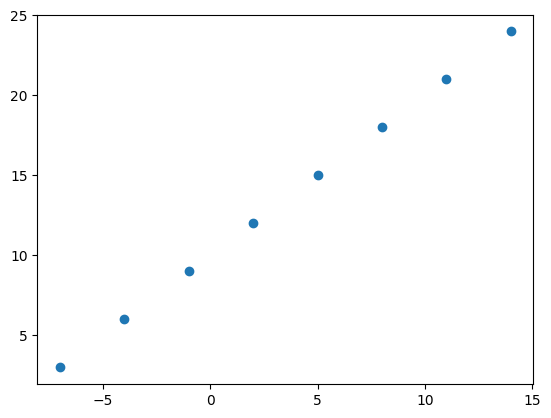

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Create Features

X = np.array([-7.0,-4.0,-1.0,2.0,5.0,8.0,11.0,14.0])

# create labels
y = np.array([3.0,6.0,9.0,12.0,15.0,18.0,21.0,24.0])


# Visualize it
plt.scatter(X,y)

In [ ]:
y== X+10

array([ True,  True,  True,  True,  True,  True,  True,  True])

### Input and output shapes

In [ ]:
#create a demo tensor for our housing price prediction problem
house_info = tf.constant(["bed","bathroom","garage"])
house_price = tf.constant([939700])
house_info,house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bed', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [ ]:
X[0],y[0]

(-7.0, 3.0)

In [ ]:
X[1],y[1]

(-4.0, 6.0)

In [ ]:
input_shape = X.shape
output_shape = y.shape
input_shape,output_shape

((8,), (8,))

In [ ]:
#Turn Numpy arrays into tensors
X=tf.cast(tf.constant(X),dtype = tf.float32)
y=tf.cast(tf.constant(y),dtype = tf.float32)
X,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

## Steps in modelling with tensorflow
1. Creating a model - define the input and output layers, as well as the hidden layers of a depp learning model.
2. Compiling a model - define the loss function (in other words, the function which tells our model how to improve the patterns its learning) and evaluation metrics (what we can use to interpret the performance of our model).
3. Fitting a model - letting the model try to find patterns between X & y(features and labels).

In [ ]:

# Set random seed
tf.random.set_seed(42)

# Create a model using the Sequential API
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # SGD is short for stochastic gradient descent
              metrics=["mae"])
# Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5
1/1 [==============================] - 2s 2s/step - loss: 20.8259 - mae: 20.8259
Epoch 2/5
1/1 [==============================] - 0s 24ms/step - loss: 20.4619 - mae: 20.4619
Epoch 3/5
1/1 [==============================] - 0s 25ms/step - loss: 20.1807 - mae: 20.1807
Epoch 4/5
1/1 [==============================] - 0s 17ms/step - loss: 19.8994 - mae: 19.8994
Epoch 5/5
1/1 [==============================] - 0s 22ms/step - loss: 19.6182 - mae: 19.6182


In [ ]:
# Check out X and Y
X,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
# try and make a prediction using our model
y_pred = model.predict([17.0])
y_pred

1/1 [==============================] - 0s 435ms/step


array([[-21.37901]], dtype=float32)

### Improving our model

We can improve our model, by altering the steps we took to create a model.
1. **Creating a model** - here we might add more layers, increase the number of hidden units (all called neurons) within each of the hidden layers, change the actvation function of each layer.
2. **Compiling a model** - here we might change the optimization function or perhaps teh **learning rate** of the optimization function.
3. **Fitting a model** - here we might fit a model for more **epochs** (leave it training for longer) or on more daat (give the model more examples to learn from).


In [ ]:
# Lets rebuild our model

#create the model
model=tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])
#complie the model
model.compile(loss = tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics =['mae'])
#fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 11.9218 - mae: 11.9218
Epoch 2/100
1/1 [==============================] - 0s 26ms/step - loss: 11.7893 - mae: 11.7893
Epoch 3/100
1/1 [==============================] - 0s 24ms/step - loss: 11.6568 - mae: 11.6568
Epoch 4/100
1/1 [==============================] - 0s 12ms/step - loss: 11.5243 - mae: 11.5243
Epoch 5/100
1/1 [==============================] - 0s 39ms/step - loss: 11.3918 - mae: 11.3918
Epoch 6/100
1/1 [==============================] - 0s 27ms/step - loss: 11.2593 - mae: 11.2593
Epoch 7/100
1/1 [==============================] - 0s 28ms/step - loss: 11.1268 - mae: 11.1268
Epoch 8/100
1/1 [==============================] - 0s 31ms/step - loss: 10.9943 - mae: 10.9943
Epoch 9/100
1/1 [==============================] - 0s 24ms/step - loss: 10.8618 - mae: 10.8618
Epoch 10/100
1/1 [==============================] - 0s 32ms/step - loss: 10.7293 - mae: 10.7293
Epoch 11/100
1/1 [==============================] -

In [ ]:
#prediction
model.predict([17.0])

1/1 [==============================] - 0s 465ms/step


array([[29.925703]], dtype=float32)

In [ ]:
#create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])
#compile the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ['mae'])
#fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 3s 3s/step - loss: 12.1553 - mae: 12.1553
Epoch 2/100
1/1 [==============================] - 0s 27ms/step - loss: 11.9970 - mae: 11.9970
Epoch 3/100
1/1 [==============================] - 0s 48ms/step - loss: 11.8234 - mae: 11.8234
Epoch 4/100
1/1 [==============================] - 0s 36ms/step - loss: 11.6321 - mae: 11.6321
Epoch 5/100
1/1 [==============================] - 0s 14ms/step - loss: 11.4204 - mae: 11.4204
Epoch 6/100
1/1 [==============================] - 0s 27ms/step - loss: 11.1848 - mae: 11.1848
Epoch 7/100
1/1 [==============================] - 0s 32ms/step - loss: 10.9215 - mae: 10.9215
Epoch 8/100
1/1 [==============================] - 0s 41ms/step - loss: 10.6258 - mae: 10.6258
Epoch 9/100
1/1 [==============================] - 0s 36ms/step - loss: 10.2919 - mae: 10.2919
Epoch 10/100
1/1 [==============================] - 0s 22ms/step - loss: 9.9131 - mae: 9.9131
Epoch 11/100
1/1 [==============================] - 0

In [ ]:
model.predict([17.0])

1/1 [==============================] - 0s 235ms/step


array([[32.51418]], dtype=float32)

In [ ]:
#creat ethe model
model=tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation = None),
    tf.keras.layers.Dense(1)])
#complie the model
model.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(lr=0.0001),
    metrics = "mae")
#fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 3s 3s/step - loss: 13.7454 - mae: 13.7454
Epoch 2/100
1/1 [==============================] - 0s 18ms/step - loss: 13.6408 - mae: 13.6408
Epoch 3/100
1/1 [==============================] - 0s 27ms/step - loss: 13.5362 - mae: 13.5362
Epoch 4/100
1/1 [==============================] - 0s 30ms/step - loss: 13.4315 - mae: 13.4315
Epoch 5/100
1/1 [==============================] - 0s 25ms/step - loss: 13.3269 - mae: 13.3269
Epoch 6/100
1/1 [==============================] - 0s 35ms/step - loss: 13.2222 - mae: 13.2222
Epoch 7/100
1/1 [==============================] - 0s 32ms/step - loss: 13.1175 - mae: 13.1175
Epoch 8/100
1/1 [==============================] - 0s 24ms/step - loss: 13.0127 - mae: 13.0127
Epoch 9/100
1/1 [==============================] - 0s 26ms/step - loss: 12.9080 - mae: 12.9080
Epoch 10/100
1/1 [==============================] - 0s 25ms/step - loss: 12.8031 - mae: 12.8031
Epoch 11/100
1/1 [==============================] -

In [ ]:
model.predict([17.0])

1/1 [==============================] - 0s 171ms/step


array([[30.150707]], dtype=float32)

### Evaluating a model

**In practice, a typical workflow you'll go through when building neural networks is:**

Build a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it -> tweak a model -. fit it -> evaluate it...

When it comes to evaluation
> **Visualize**

It's good idea to visualize:
* The data - what data are we working with? What does it look like?
* The model itself - what does our model look like ?
* the training of a model - how does a model perform while it learns ?
* The predictions of the model - how do the predictions of a model line up against the ground thruth(the original lables)?

In [ ]:
# Make a bigger dataset
X = tf.range(-100,100,4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [ ]:
# Make labels for the dataset
y = X+10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

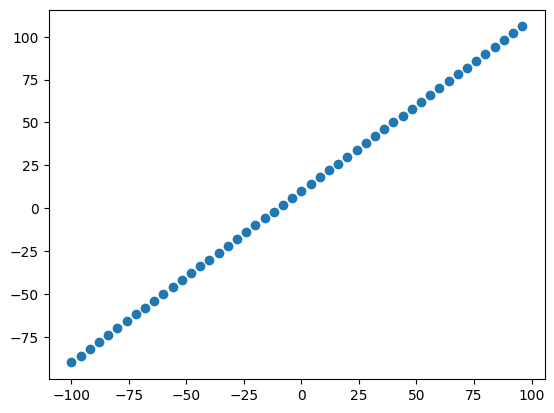

In [ ]:
#Visualize the data
plt.scatter(X,y)

In [ ]:
len(X)

50

In [ ]:
# Splitting the data into training and testing data
X_train = X[:40]
X_test = X[40:]
y_train = y[:40]
y_test = y[40:]

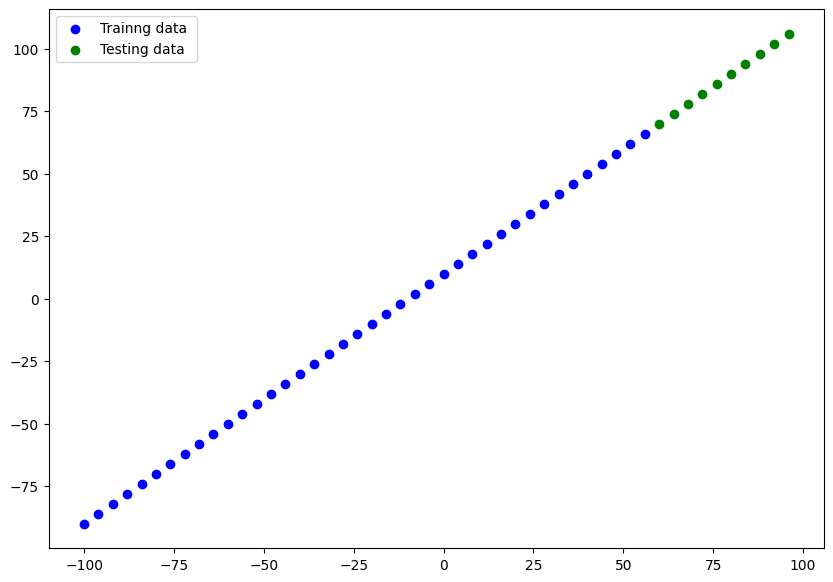

In [ ]:
#Visualizing the data
plt.figure(figsize=(10,7))
plt.scatter(X_train,y_train, c="b",label = "Trainng data ")
plt.scatter(X_test,y_test,c="g",label= "Testing data")
plt.legend();

In [ ]:
#Building the model
#create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])
#Complie the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics=["mae"]
              )
#Fitting the model
#model.fit(X_train,y_train,epochs=100)

### Visulaizing the model

In [ ]:
model.summary()

ValueError: This model has not yet been built. Build the model first by calling `build()` or by calling the model on a batch of data.

In [ ]:
#create a model which biulds automatically by defining the inpu_shape argument
tf.random.set_seed(42)

#create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1,input_shape = [1],name = "input_layer"),
    tf.keras.layers.Dense(1,name = 'output_layer')
],name='model_1')
#complie the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = "mae")

In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 1)                 2         
                                                                 
 output_layer (Dense)        (None, 1)                 2         
                                                                 
Total params: 4 (16.00 Byte)
Trainable params: 4 (16.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


* Total params - total number of parameters in the model.
* Trainable parameters - these are the parameters (patterns) the model can update as it trains.
* Non-Trainable params - these parameters aren't updated during training (this is typical when you bring in already learn patterns or parameters from other models during transfer learning)

In [ ]:
#Fiting the model
model.fit(X_train,y_train,epochs=100,verbose=0)

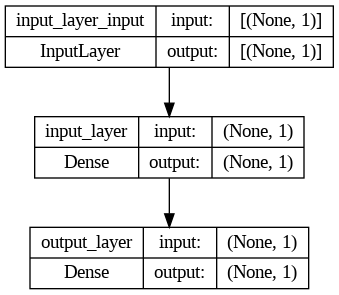

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model = model , show_shapes = True)

### Visualizing model's prediction
**y_test verses y_pred**

In [ ]:
#make some predictions
y_pred = model.predict(y_test)
y_pred

1/1 [==============================] - 0s 57ms/step


array([[ 91.29092 ],
       [ 96.40505 ],
       [101.519196],
       [106.63332 ],
       [111.74747 ],
       [116.8616  ],
       [121.97574 ],
       [127.089874],
       [132.20401 ],
       [137.31815 ]], dtype=float32)

In [ ]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [ ]:

#function for plotting
def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = y_pred):
  plt.figure(figsize=(10,7))
  plt.scatter(train_data,train_labels,c="b",label="Training data")
  plt.scatter(test_data,test_labels,c="g",label="Testing data")
  plt.scatter(test_data,predictions,c="r",label="Predictions")
  plt.legend();

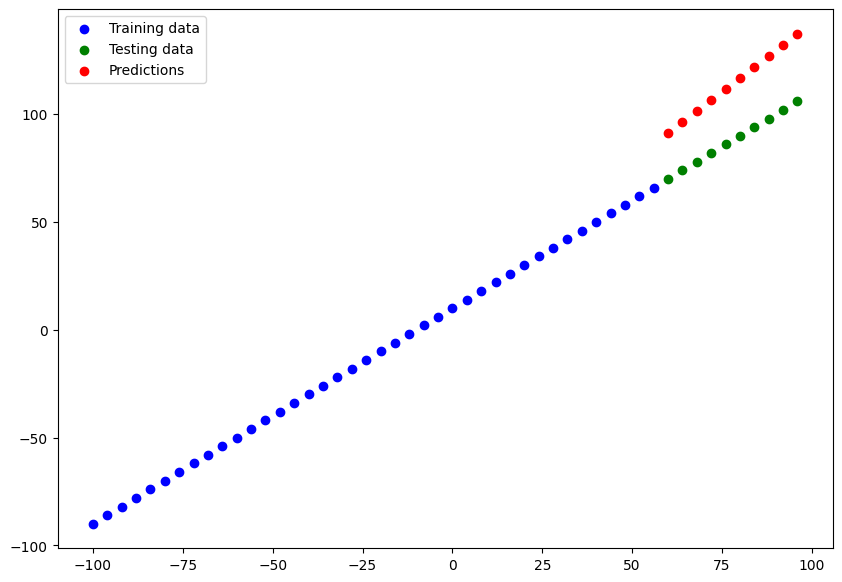

In [ ]:
plot_predictions(train_data=X_train,
                 train_labels=y_train,
                 test_data = X_test,
                 test_labels=y_test,
                 predictions=y_pred)

### Evaluating our model's prediction with regression evaluation metrics
Three of the main Metrics:
* MAE- mean absolute error, "on average, how wrong is each of my model's predictions"
* MSE - mean square error, "square the average errors"
* Huber - Combination of MSE and MAE , less sensitive to outliers than MSE

In [ ]:
#Evaluate the model on the test set
model.evaluate(X_test,y_test)

1/1 [==============================] - 0s 458ms/step - loss: 13.5192 - mae: 13.5192


[13.519189834594727, 13.519189834594727]

In [ ]:

def mae(y_test, y_pred):
  """
  Calculuates mean absolute error between y_test and y_preds.
  """
  return tf.metrics.mean_absolute_error(y_test,
                                        y_pred=tf.squezee(y_pred))

def mse(y_test, y_pred):
  """
  Calculates mean squared error between y_test and y_preds.
  """
  return tf.metrics.mean_squared_error(y_test,
                                       y_pred=tf.squeeze(y_pred))

### Running experiments to improve a model

```
Build a model -> fit it -> evaluate it -> tweak it -> fit it -> evaluate it ->
tweak it -> fit it -> evaluate it ....

```

1. Get more data - get more examples for your model to train on.
2. Make your model larger
3. Train for longer - give your model more chance to find patterns in the data

1. `model_1` - 1 Layer , 100 epochs
2. `model_2` - 2 Layers , 100 epochs
3. `model_3` - 2 Layers , 500 epochs

In [ ]:
#Set random seed
tf.random.set_seed(42)
# Creating model_1
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])
# 2. Compile the model

model_1.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics = 'mae')
# 3. Fit the model
model_1.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 11ms/step - loss: 10.9230 - mae: 10.9230
Epoch 2/100
2/2 [==============================] - 0s 8ms/step - loss: 7.5982 - mae: 7.5982
Epoch 3/100
2/2 [==============================] - 0s 7ms/step - loss: 10.3514 - mae: 10.3514
Epoch 4/100
2/2 [==============================] - 0s 8ms/step - loss: 9.3389 - mae: 9.3389
Epoch 5/100
2/2 [==============================] - 0s 8ms/step - loss: 10.2152 - mae: 10.2152
Epoch 6/100
2/2 [==============================] - 0s 7ms/step - loss: 9.4708 - mae: 9.4708
Epoch 7/100
2/2 [==============================] - 0s 7ms/step - loss: 8.6032 - mae: 8.6032
Epoch 8/100
2/2 [==============================] - 0s 8ms/step - loss: 9.0392 - mae: 9.0392
Epoch 9/100
2/2 [==============================] - 0s 7ms/step - loss: 18.8489 - mae: 18.8489
Epoch 10/100
2/2 [==============================] - 0s 11ms/step - loss: 10.1625 - mae: 10.1625
Epoch 11/100
2/2 [==============================] - 0s 8ms/step - l

1/1 [==============================] - 0s 50ms/step


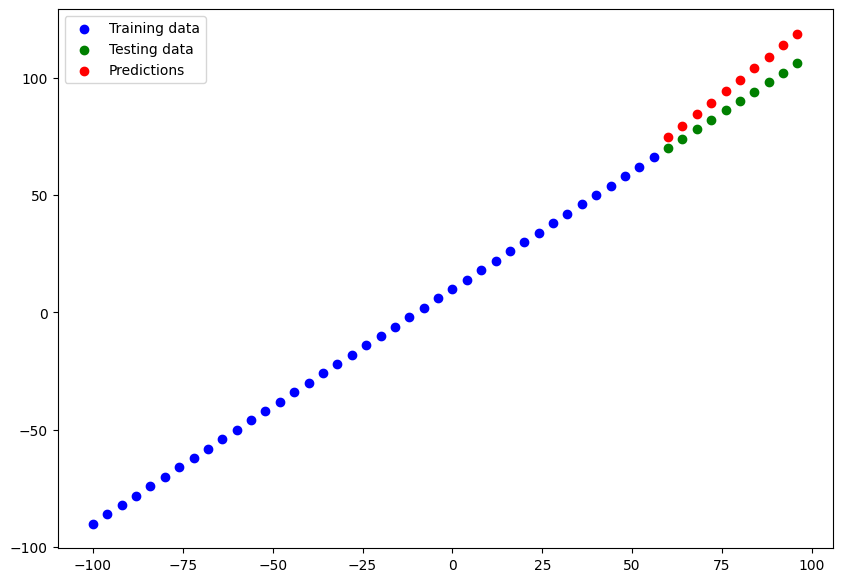

In [ ]:
# Make and plot predictions for model_1

y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions=y_preds_1)

In [ ]:
model_1.evaluate(X_test,y_test)

1/1 [==============================] - 0s 120ms/step - loss: 8.6541 - mae: 8.6541


[8.654050827026367, 8.654050827026367]

In [ ]:
mae_1 = mae(y_test,tf.squeeze(y_preds_1))
mse_1 = mse(y_test,tf.squeeze(y_preds_1))

mae_1,mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=8.654051>,
 <tf.Tensor: shape=(), dtype=float32, numpy=81.41448>)

In [ ]:
# Building the model 2
# Set the random Seed
tf.random.set_seed(42)
# create the model
model_2 = tf.keras.Sequential([
     tf.keras.layers.Dense(10),
     tf.keras.layers.Dense(1)
 ])
# Complile the model
model_2.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics = 'mae')
# Fit the model

model_2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 11ms/step - loss: 49.0723 - mae: 49.0723
Epoch 2/100
2/2 [==============================] - 0s 7ms/step - loss: 31.6189 - mae: 31.6189
Epoch 3/100
2/2 [==============================] - 0s 7ms/step - loss: 36.1965 - mae: 36.1965
Epoch 4/100
2/2 [==============================] - 0s 7ms/step - loss: 29.4058 - mae: 29.4058
Epoch 5/100
2/2 [==============================] - 0s 7ms/step - loss: 15.9104 - mae: 15.9104
Epoch 6/100
2/2 [==============================] - 0s 7ms/step - loss: 12.6056 - mae: 12.6056
Epoch 7/100
2/2 [==============================] - 0s 9ms/step - loss: 11.8613 - mae: 11.8613
Epoch 8/100
2/2 [==============================] - 0s 6ms/step - loss: 12.9113 - mae: 12.9113
Epoch 9/100
2/2 [==============================] - 0s 7ms/step - loss: 33.9523 - mae: 33.9523
Epoch 10/100
2/2 [==============================] - 0s 7ms/step - loss: 23.2515 - mae: 23.2515
Epoch 11/100
2/2 [==============================] - 0s 9ms

1/1 [==============================] - 0s 79ms/step


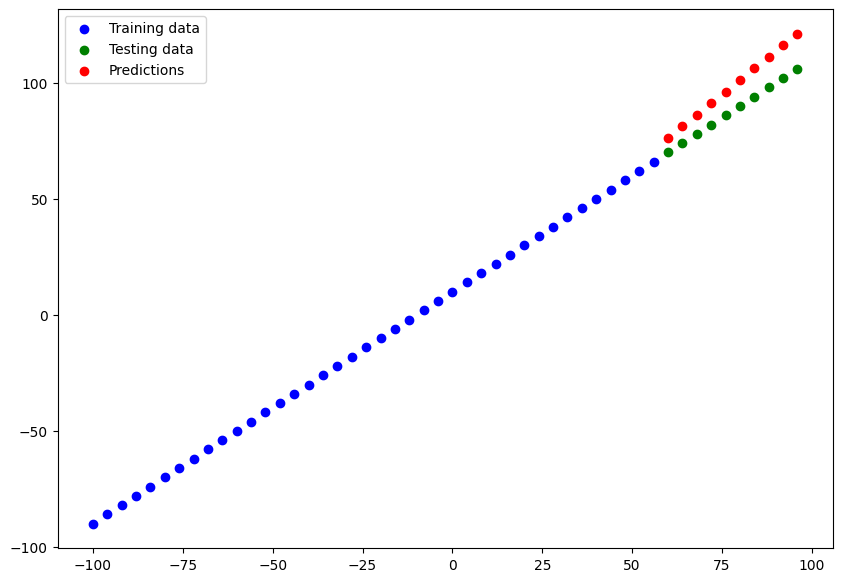

In [ ]:
# Make and plot predictions for model_2

y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions=y_preds_2)


In [ ]:
mae_2 = mae(y_test,tf.squeeze(y_preds_2))
mse_2 = mse(y_test,tf.squeeze(y_preds_2))

mae_2,mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=10.710168>,
 <tf.Tensor: shape=(), dtype=float32, numpy=122.53689>)

In [ ]:
# Building model 3
# Set random seed

tf.random.set_seed(42)

# Building the model

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Compiling the model

model_3.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics = 'mae')

# Fit the model
model_3.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=500)

Epoch 1/500
2/2 [==============================] - 2s 29ms/step - loss: 56.1798 - mae: 56.1798
Epoch 2/500
2/2 [==============================] - 0s 52ms/step - loss: 29.4609 - mae: 29.4609
Epoch 3/500
2/2 [==============================] - 0s 32ms/step - loss: 32.8612 - mae: 32.8612
Epoch 4/500
2/2 [==============================] - 0s 20ms/step - loss: 17.5749 - mae: 17.5749
Epoch 5/500
2/2 [==============================] - 0s 15ms/step - loss: 23.7041 - mae: 23.7041
Epoch 6/500
2/2 [==============================] - 0s 14ms/step - loss: 10.7508 - mae: 10.7508
Epoch 7/500
2/2 [==============================] - 0s 21ms/step - loss: 11.7968 - mae: 11.7968
Epoch 8/500
2/2 [==============================] - 0s 10ms/step - loss: 12.9059 - mae: 12.9059
Epoch 9/500
2/2 [==============================] - 0s 40ms/step - loss: 33.9421 - mae: 33.9421
Epoch 10/500
2/2 [==============================] - 0s 15ms/step - loss: 23.2451 - mae: 23.2451
Epoch 11/500
2/2 [==============================]

1/1 [==============================] - 0s 86ms/step


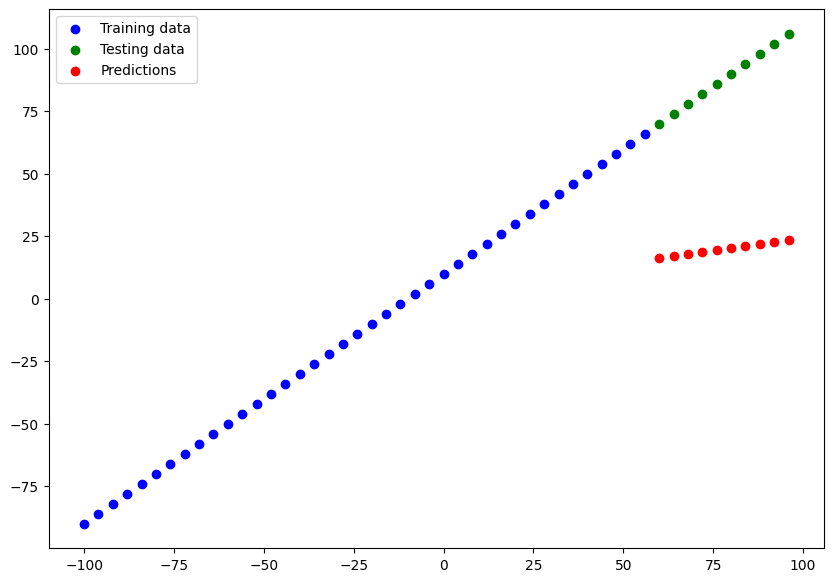

In [ ]:
# Make and plot predictions for model_3

y_preds_3 = model_3.predict(X_test)
plot_predictions(predictions=y_preds_3)

In [ ]:
mae_3 = mae(y_test,tf.squeeze(y_preds_3))
mse_3 = mse(y_test,tf.squeeze(y_preds_3))

mae_3,mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=68.05367>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4715.999>)

### Comparing the results of our experiments

In [ ]:
# Lets compare our models results using pandas DataFrame

import pandas as pd

model_results = [["model_1", mae_1.numpy(),mse_1.numpy()],
                 ["model_2",mae_2.numpy(),mse_2.numpy()],
                 ["model_3",mae_3.numpy(),mse_3.numpy()]]


all_results = pd.DataFrame(model_results , columns = ["model","mae","mse"])

all_results

,model,mae,mse
0,model_1,8.654051,81.414482
1,model_2,10.710168,122.536888
2,model_3,68.053673,4715.999023


from matplotlib import pyplot as plt
all_results['mae'].plot(kind='hist', bins=20, title='mae')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
all_results['mse'].plot(kind='hist', bins=20, title='mse')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
all_results.groupby('model').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
all_results.plot(kind='scatter', x='mae', y='mse', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['mae']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'mae'}, axis=1)
              .sort_values('mae', ascending=True))
  xs = counted['mae']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = all_results.sort_values('mae', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('model')):
  _plot_series(series, series_name, i)
  fig.legend(title='model', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('mae')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['mse']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'mse'}, axis=1)
              .sort_values('mse', ascending=True))
  xs = counted['mse']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = all_results.sort_values('mse', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('model')):
  _plot_series(series, series_name, i)
  fig.legend(title='model', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('mse')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
all_results['mae'].plot(kind='line', figsize=(8, 4), title='mae')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
all_results['mse'].plot(kind='line', figsize=(8, 4), title='mse')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(all_results['model'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(all_results, x='mae', y='model', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(all_results['model'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(all_results, x='mse', y='model', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['mae'].plot(kind='hist', bins=20, title='mae')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['mse'].plot(kind='hist', bins=20, title='mse')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_3.groupby('model').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='index', y='mae', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='mae', y='mse', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_6.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('model')):
  _plot_series(series, series_name, i)
  fig.legend(title='model', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['mae']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'mae'}, axis=1)
              .sort_values('mae', ascending=True))
  xs = counted['mae']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_7.sort_values('mae', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('model')):
  _plot_series(series, series_name, i)
  fig.legend(title='model', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('mae')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['mse']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'mse'}, axis=1)
              .sort_values('mse', ascending=True))
  xs = counted['mse']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('mse', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('model')):
  _plot_series(series, series_name, i)
  fig.legend(title='model', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('mse')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_9['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['mae'].plot(kind='line', figsize=(8, 4), title='mae')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['mse'].plot(kind='line', figsize=(8, 4), title='mse')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_12['model'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_12, x='index', y='model', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_13['model'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_13, x='mae', y='model', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_14['model'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_14, x='mse', y='model', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:
model_1.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Saving our models

There are two main formats we can save our models
1. The SavedModel Format
2. The HDF5 Format

In [ ]:
# Save the model using the SavedModel Format
model_1.save("best_model_Saved_Model_Format")

In [ ]:
# Save the model in HDF5 format
model_2.save("best_model_HDF5_format.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Loading in the saved model


In [ ]:
# Load in the SavedModel format
loaded_SavedModel_Format = tf.keras.models.load_model("/content/best_model_Saved_Model_Format")
loaded_SavedModel_Format.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Comparing model_1 predictions with SavedModel Format model predictions

model_1_preds = model_1.predict(X_test)
loaded_SavedModel_Format_preds = loaded_SavedModel_Format.predict(X_test)

model_1_preds == loaded_SavedModel_Format_preds

1/1 [==============================] - 0s 92ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [ ]:
# Load in a model using H5 format
loaded_h5_model = tf.keras.models.load_model("/content/best_model_HDF5_format.h5")
loaded_h5_model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 10)                20        
                                                                 
 dense_15 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Download a model from Google Colab

1. You can downlaod it from files
2. Write code
3. Save it to google drive

In [ ]:
# Downlaod a file from google colab
from google.colab import files
files.download("/content/best_model_HDF5_format.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Save to google drive (requires mounting Google Drive)
!cp "model path " "Drive Loacation Path"

In [1]:
# Import required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
insurance['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [4]:
# One-hot encoding
df_one_hot = pd.get_dummies(insurance)
df_one_hot

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


In [5]:
# Create X and Y (features and labels)
X = df_one_hot.drop("charges",axis = 1)
y = df_one_hot["charges"]

In [6]:
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [7]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [8]:
# Creating Training and Testing
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size = 0.2 , random_state=42)


In [9]:
# Set the random seed
tf.random.set_seed(42)
# Create a model
insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
# Compile the model
insurance_model.compile(loss = tf.keras.losses.mae,
                        optimizer = tf.keras.optimizers.SGD(),
                        metrics = 'mae')
# Fit the model
insurance_model.fit(X_train,y_train,epochs = 100)

Epoch 1/100
34/34 [==============================] - 2s 5ms/step - loss: 8592.5547 - mae: 8592.5547
Epoch 2/100
34/34 [==============================] - 0s 7ms/step - loss: 7878.0981 - mae: 7878.0981
Epoch 3/100
34/34 [==============================] - 0s 5ms/step - loss: 7551.3091 - mae: 7551.3091
Epoch 4/100
34/34 [==============================] - 0s 3ms/step - loss: 7701.9873 - mae: 7701.9873
Epoch 5/100
34/34 [==============================] - 0s 4ms/step - loss: 7675.9946 - mae: 7675.9946
Epoch 6/100
34/34 [==============================] - 0s 5ms/step - loss: 7598.9399 - mae: 7598.9399
Epoch 7/100
34/34 [==============================] - 0s 4ms/step - loss: 7577.0752 - mae: 7577.0752
Epoch 8/100
34/34 [==============================] - 0s 6ms/step - loss: 7694.3643 - mae: 7694.3643
Epoch 9/100
34/34 [==============================] - 0s 6ms/step - loss: 7562.5547 - mae: 7562.5547
Epoch 10/100
34/34 [==============================] - 0s 10ms/step - loss: 7679.3701 - mae: 7679.370

In [10]:
# Check the results on test data
insurance_model.evaluate(X_test,y_test)

9/9 [==============================] - 0s 4ms/step - loss: 8847.9844 - mae: 8847.9844


[8847.984375, 8847.984375]

# Lets try to improve our model

we'll run 2 experiments
1. Add an extra layer with more hidden units
2. Train for longer


In [11]:
# Set random seed
tf.random.set_seed(42)
# Creating the model
insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)

])

# compile the model
insurance_model_2.compile(loss = tf.keras.losses.mae,
                          optimizer = tf.keras.optimizers.Adam(),
                          metrics = ['mae'])
# fit the model
insurance_model_2.fit(X_train,y_train,epochs = 100)

Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: 13299.4316 - mae: 13299.4316
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 13146.3174 - mae: 13146.3174
Epoch 3/100
34/34 [==============================] - 0s 4ms/step - loss: 12830.4912 - mae: 12830.4912
Epoch 4/100
34/34 [==============================] - 0s 3ms/step - loss: 12202.9014 - mae: 12202.9014
Epoch 5/100
34/34 [==============================] - 0s 3ms/step - loss: 11117.5293 - mae: 11117.5293
Epoch 6/100
34/34 [==============================] - 0s 7ms/step - loss: 9661.6855 - mae: 9661.6855
Epoch 7/100
34/34 [==============================] - 0s 10ms/step - loss: 8268.2578 - mae: 8268.2578
Epoch 8/100
34/34 [==============================] - 0s 4ms/step - loss: 7546.1367 - mae: 7546.1367
Epoch 9/100
34/34 [==============================] - 0s 3ms/step - loss: 7417.8521 - mae: 7417.8521
Epoch 10/100
34/34 [==============================] - 0s 3ms/step - loss: 7396.8828 - mae

In [12]:
insurance_model_2.evaluate(X_train,y_train)

34/34 [==============================] - 0s 2ms/step - loss: 4982.3818 - mae: 4982.3818


[4982.3818359375, 4982.3818359375]

In [13]:
# set the random seed
tf.random.set_seed(42)
# create the model
insurance_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
# compile the model
insurance_model_3.compile(loss = tf.keras.losses.mae,
                          optimizer = tf.keras.optimizers.Adam(),
                          metrics = ['mae'])
# Fit the model
history = insurance_model_3.fit(X_train,y_train,epochs=300)

Epoch 1/300
34/34 [==============================] - 1s 2ms/step - loss: 13287.0312 - mae: 13287.0312
Epoch 2/300
34/34 [==============================] - 0s 2ms/step - loss: 13122.8320 - mae: 13122.8320
Epoch 3/300
34/34 [==============================] - 0s 2ms/step - loss: 12785.5830 - mae: 12785.5830
Epoch 4/300
34/34 [==============================] - 0s 2ms/step - loss: 12122.5605 - mae: 12122.5605
Epoch 5/300
34/34 [==============================] - 0s 2ms/step - loss: 11006.3848 - mae: 11006.3848
Epoch 6/300
34/34 [==============================] - 0s 2ms/step - loss: 9576.1445 - mae: 9576.1445
Epoch 7/300
34/34 [==============================] - 0s 2ms/step - loss: 8247.5547 - mae: 8247.5547
Epoch 8/300
34/34 [==============================] - 0s 2ms/step - loss: 7581.5869 - mae: 7581.5869
Epoch 9/300
34/34 [==============================] - 0s 2ms/step - loss: 7461.0820 - mae: 7461.0820
Epoch 10/300
34/34 [==============================] - 0s 2ms/step - loss: 7439.3457 - mae:

In [14]:
insurance_model_3.evaluate(X_test,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3224.2971 - mae: 3224.2971


[3224.297119140625, 3224.297119140625]

Text(0.5, 0, 'epochs')

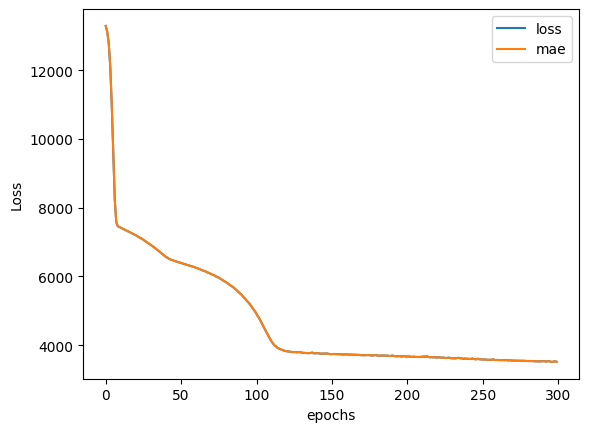

In [15]:
# Plot history (also known as loss curve or a training curve)
pd.DataFrame(history.history).plot()
plt.ylabel("Loss")
plt.xlabel("epochs")

**Question**:How Long should you train for ?

It depends. On the problem you are working on.
Tensorflow has a solution! It's called EarlyStopping Callback, which is a TensorFlow component you can add to your model to stop training once its stops improving a certain metrics

### Preprocessing data (normalization and standardization)

In terms of scaling values, neural networks tend to prefer normalization.
If you're not sure on which to use, you could try both and see which performs better.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")


In [2]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


To prepaer our data we can borrow a few classes from Scikit-Learn

In [22]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
ct = make_column_transformer((MinMaxScaler(),['age','bmi','children']),
                             (OneHotEncoder(handle_unknown="ignore"),['sex','smoker','region']))
# Create X & y
X=insurance.drop('charges', axis =1)
y=insurance['charges']

# builind training and testing dataset

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# Fit the column transformer to our training data
ct.fit(X_train)
# Transform training and test data with normalization (MinMaxScaler) and OneHotEncoder
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [23]:
# What does our data look like
X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [24]:
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [25]:
X_train.shape,X_train_normal.shape

((1070, 6), (1070, 11))

In [26]:
# Build a NN model to fit on our normalized data
# Set the random sees
tf.random.set_seed(42)
# Building the model
new_model = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
# Compiling the model
new_model.compile(loss = tf.keras.losses.mae,
                  optimizer = tf.keras.optimizers.Adam(),
                  metrics=['mae'])
new_model.fit(X_train_normal,y_train,epochs=100)

Epoch 1/100
34/34 [==============================] - 2s 6ms/step - loss: 13343.6865 - mae: 13343.6865
Epoch 2/100
34/34 [==============================] - 0s 5ms/step - loss: 13334.5547 - mae: 13334.5547
Epoch 3/100
34/34 [==============================] - 0s 6ms/step - loss: 13311.7363 - mae: 13311.7363
Epoch 4/100
34/34 [==============================] - 0s 5ms/step - loss: 13264.3115 - mae: 13264.3115
Epoch 5/100
34/34 [==============================] - 0s 5ms/step - loss: 13181.3555 - mae: 13181.3555
Epoch 6/100
34/34 [==============================] - 0s 5ms/step - loss: 13051.6885 - mae: 13051.6885
Epoch 7/100
34/34 [==============================] - 0s 4ms/step - loss: 12864.8574 - mae: 12864.8574
Epoch 8/100
34/34 [==============================] - 0s 5ms/step - loss: 12610.8691 - mae: 12610.8691
Epoch 9/100
34/34 [==============================] - 0s 6ms/step - loss: 12279.6328 - mae: 12279.6328
Epoch 10/100
34/34 [==============================] - 0s 5ms/step - loss: 11868.15

In [27]:
new_model.evaluate(X_test_normal,y_test)

9/9 [==============================] - 0s 5ms/step - loss: 3436.5339 - mae: 3436.5339


[3436.533935546875, 3436.533935546875]